In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd /content/drive/My\ Drive/
%cd broutanlab_course/

Mounted at /content/drive
/content/drive/My Drive
/content/drive/My Drive/broutanlab_course


### Face Recognition

In [3]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=818c61d6edede829e35e9a6cae8bfaf664c6de33ca35d67a7f875124d45b8b3f
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [4]:
import face_recognition
from sklearn import svm
import os
from imutils import paths
import matplotlib.pyplot as plt


In [5]:
# Training the SVC classifier

# The training data would be all the face encodings from all the known images and the labels are their names
encodings = []
names = []

# Training directory
train_dir = os.listdir('dataset3/')


# Loop through each person in the training directory
for person in train_dir:
    pix = os.listdir("dataset3/" + person)

    # Loop through each training image for the current person
    for person_img in pix:
        # Get the face encodings for the face in each image file
        face = face_recognition.load_image_file("dataset3/" + person + "/" + person_img)
        face_bounding_boxes = face_recognition.face_locations(face)

        #If training image contains exactly one face
        if len(face_bounding_boxes) == 1:
            face_enc = face_recognition.face_encodings(face)[0]
            # Add face encoding for current image with corresponding label (name) to the training data
            encodings.append(face_enc)
            names.append(person)
        else:
            print(person + "/" + person_img + " was skipped and can't be used for training")



Unknown/Ryan-Gosling.jpg was skipped and can't be used for training


In [6]:
# Create and train the SVC classifier
clf = svm.SVC(gamma='scale')
clf.fit(encodings,names)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

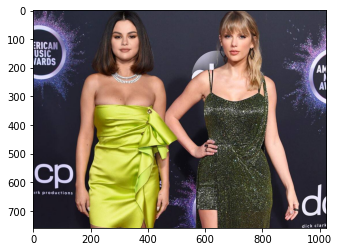

Number of faces detected:  2
Found:
Selena Gomez
Unknown


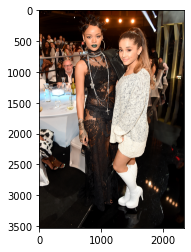

Number of faces detected:  10
Found:
Ariana Grande
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown
Unknown


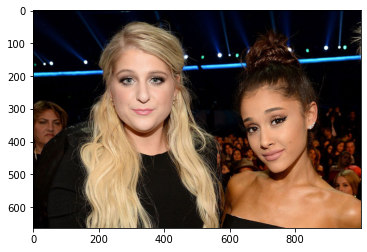

Number of faces detected:  5
Found:
Unknown
Ariana Grande
Unknown
Unknown
Unknown


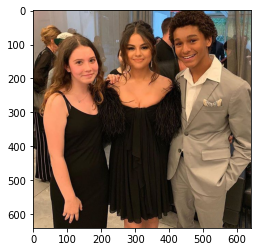

Number of faces detected:  3
Found:
Selena Gomez
Unknown
Unknown


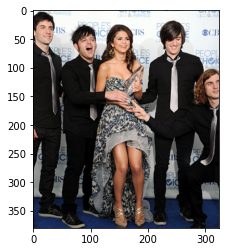

Number of faces detected:  5
Found:
Unknown
Selena Gomez
Unknown
Unknown
Unknown


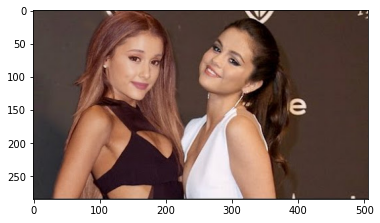

Number of faces detected:  2
Found:
Ariana Grande
Selena Gomez


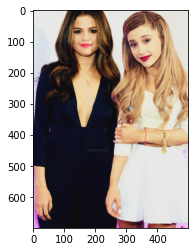

Number of faces detected:  2
Found:
Selena Gomez
Ariana Grande


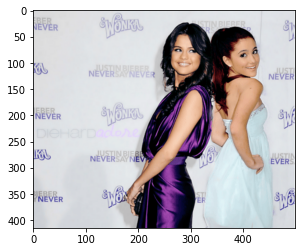

Number of faces detected:  2
Found:
Selena Gomez
Ariana Grande


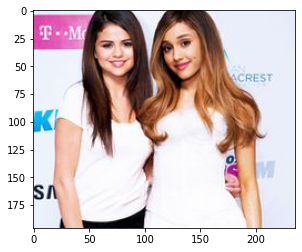

Number of faces detected:  2
Found:
Selena Gomez
Ariana Grande


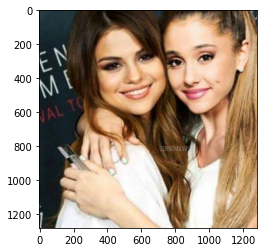

Number of faces detected:  2
Found:
Ariana Grande
Selena Gomez


In [14]:
# Load the test image with unknown faces into a numpy array



imagePaths = list(paths.list_images('test3'))
for (i, imagePath) in enumerate(imagePaths):
  test_image = face_recognition.load_image_file(imagePath)
  plt.imshow(test_image)
  plt.show()
  # Find all the faces in the test image using the default HOG-based model
  face_locations = face_recognition.face_locations(test_image)
  print("Number of faces detected: ", len(face_locations))
  # Predict all the faces in the test image using the trained classifier
  print("Found:")
  for i in range(len(face_locations)):
      
      test_image_enc = face_recognition.face_encodings(test_image)[i]
      name = clf.predict([test_image_enc])
      
      print(*name)

